In [ ]:
!pip install ta
!pip install quantstats


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as mtick
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Financial Data Analysis
import yfinance as yf
import ta
import quantstats as qs

# Machine Learning
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
aapl = yf.download('AAPL')
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
...,...,...,...,...,...,...
2024-01-22,192.300003,195.330002,192.259995,193.889999,193.889999,60133900
2024-01-23,195.020004,195.750000,193.830002,195.179993,195.179993,42355600
2024-01-24,195.419998,196.380005,194.339996,194.500000,194.500000,53631300


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'


In [ ]:
candlestick = go.Candlestick(x = aapl.index,
                             open = aapl['Open'],
                             high = aapl['High'],
                             low = aapl['Low'],
                             close = aapl['Adj Close'],
                             increasing = dict(line = dict(color = 'black')),
                             decreasing = dict(line = dict (color = 'red')),
                             showlegend = False)

layout = go.Layout(
    title = 'Adjusted Apple Stock Price - 1980 to 2023 ',
    yaxis = dict(title = 'Price(USD)'),
    xaxis = dict(title= 'Date'),
    template = 'ggplot2',
    xaxis_rangeslider_visible=False,
    yaxis_gridcolor='white',
    xaxis_gridcolor='white',
    yaxis_tickfont=dict(color='black'),
    xaxis_tickfont=dict(color='black'),
    margin=dict(t=50,l=50,r=50,b=50)
)

fig = go.Figure(data=[candlestick], layout = layout)

fig.add_annotation(text = 'Apple(AAPL)',
                   font = dict(color= 'gray',size = 30),
                   xref = 'paper', yref = 'paper',
                   x = 0.5, y = 0.5,
                   showarrow = False,
                   opacity = 1.0)

fig.show()

In [ ]:
train = aapl[aapl.index.year <= 2010]
test = aapl[aapl.index.year >= 2011]

In [ ]:
train['Close_Shift'] = train['Adj Close'].shift(1)
test['Close_Shift'] = test['Adj Close'].shift(1)

train['Return'] = (train['Adj Close']/train['Close_Shift'] - 1) * 100
test['Return'] = (test['Adj Close'] / test['Close_Shift'] - 1) * 100


In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume,Close_Shift,Return
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800,0.099319,-5.217030
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000,0.094137,-7.339834
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600,0.087228,2.475132
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600,0.089387,2.899234
...,...,...,...,...,...,...,...,...
2010-12-27,11.530357,11.622857,11.482857,11.595714,9.829452,249816000,9.796753,0.333770
2010-12-28,11.639643,11.666429,11.609286,11.623929,9.853370,175924000,9.829452,0.243331
2010-12-29,11.650714,11.658929,11.610714,11.617500,9.847918,163139200,9.853370,-0.055333


In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume,Close_Shift,Return
Date,,,,,,,,
2011-01-03,11.630000,11.795000,11.601429,11.770357,9.977494,445138400,NaN,NaN
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.029564,309080800,9.977494,0.521871
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.111609,255519600,10.029564,0.818028
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.103436,300428800,10.111609,-0.080828
2011-01-07,11.928214,12.012500,11.853571,12.004286,10.175791,311931200,10.103436,0.716145
...,...,...,...,...,...,...,...,...
2024-01-22,192.300003,195.330002,192.259995,193.889999,193.889999,60133900,191.559998,1.216330
2024-01-23,195.020004,195.750000,193.830002,195.179993,195.179993,42355600,193.889999,0.665322
2024-01-24,195.419998,196.380005,194.339996,194.500000,194.500000,53631300,195.179993,-0.348393


In [ ]:
train['target'] = np.where(train['Return'].shift(-1) > 0, 1, 0)
test['target'] = np.where(test['Return'].shift(-1) > 0, 1, 0)

In [ ]:
train.head(15)

,Open,High,Low,Close,Adj Close,Volume,Close_Shift,Return,target
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600,NaN,NaN,0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800,0.099319,-5.217030,0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000,0.094137,-7.339834,1
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600,0.087228,2.475132,1
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600,0.089387,2.899234,1
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097592,48630400,0.091978,6.102890,1
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102341,37363200,0.097592,4.866973,1
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106660,46950400,0.102341,4.219864,1
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.112273,48003200,0.106660,5.262799,1


In [ ]:
x_train = train.drop('target', axis = 1)
y_train = train.target
x_test = test.drop('target', axis = 1)
y_test = test.target

In [ ]:
x_train

,Open,High,Low,Close,Adj Close,Volume,Close_Shift,Return
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800,0.099319,-5.217030
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000,0.094137,-7.339834
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600,0.087228,2.475132
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600,0.089387,2.899234
...,...,...,...,...,...,...,...,...
2010-12-27,11.530357,11.622857,11.482857,11.595714,9.829452,249816000,9.796753,0.333770
2010-12-28,11.639643,11.666429,11.609286,11.623929,9.853370,175924000,9.829452,0.243331
2010-12-29,11.650714,11.658929,11.610714,11.617500,9.847918,163139200,9.853370,-0.055333


In [ ]:
def feature_engineering(df):

    # SMA calculations
    df['sma5'] = ta.trend.sma_indicator(df['Adj Close'], window=5)
    df['sma10'] = ta.trend.sma_indicator(df['Adj Close'], window=10)
    df['sma15'] = ta.trend.sma_indicator(df['Adj Close'], window=15)
    df['sma20'] = ta.trend.sma_indicator(df['Adj Close'], window=20)
    df['sma30'] = ta.trend.sma_indicator(df['Adj Close'], window=30)
    df['sma50'] = ta.trend.sma_indicator(df['Adj Close'], window=50)
    df['sma80'] = ta.trend.sma_indicator(df['Adj Close'], window=80)
    df['sma100'] = ta.trend.sma_indicator(df['Adj Close'], window=100)
    df['sma200'] = ta.trend.sma_indicator(df['Adj Close'], window=200)

    # SMA Ratios
    df['sma5_ratio'] = df['Adj Close'] / df['sma5']
    df['sma10_ratio'] = df['Adj Close'] / df['sma10']
    df['sma15_ratio'] = df['Adj Close'] / df['sma15']
    df['sma20_ratio'] = df['Adj Close'] / df['sma20']
    df['sma30_ratio'] = df['Adj Close'] / df['sma30']
    df['sma50_ratio'] = df['Adj Close'] / df['sma50']
    df['sma80_ratio'] = df['Adj Close'] / df['sma80']
    df['sma100_ratio'] = df['Adj Close'] / df['sma100']
    df['sma200_ratio'] = df['Adj Close'] / df['sma200']

    # Additional indicators
    df['rsi'] = ta.momentum.RSIIndicator(df['Adj Close']).rsi()
    df['cci'] = ta.trend.cci(df['High'], df['Low'], df['Close'], window=20, constant=0.015)
    bb_indicator = ta.volatility.BollingerBands(df['Adj Close'])
    df['bb_high'] = bb_indicator.bollinger_hband()
    df['bb_low'] = bb_indicator.bollinger_lband()
    df['obv'] = ta.volume.OnBalanceVolumeIndicator(df['Adj Close'], df['Volume']).on_balance_volume()

    # Indicator conditions
    df['rsi_overbought'] = (df['rsi'] >= 70).astype(int)
    df['rsi_oversold'] = (df['rsi'] <= 30).astype(int)
    df['above_bb_high'] = (df['Adj Close'] >= df['bb_high']).astype(int)
    df['obv_divergence_10_days'] = df['obv'].diff().rolling(10).sum() - df['Adj Close'].diff().rolling(10).sum()
    df['obv_divergence_20_days'] = df['obv'].diff().rolling(20).sum() - df['Adj Close'].diff().rolling(20).sum()
    df['cci_high'] = (df['cci'] >= 120).astype(int)
    df['cci_low'] = (df['cci'] <= -120).astype(int)

    # SMA Comparisons
    df['sma5 > sma10'] = (df['sma5'] > df['sma10']).astype(int)
    df['sma10 > sma15'] = (df['sma10'] > df['sma15']).astype(int)
    df['sma15 > sma20'] = (df['sma15'] > df['sma20']).astype(int)
    df['sma20 > sma30'] = (df['sma20'] > df['sma30']).astype(int)
    df['sma30 > sma50'] = (df['sma30'] > df['sma50']).astype(int)
    df['sma50 > sma80'] = (df['sma50'] > df['sma80']).astype(int)
    df['sma80 > sma100'] = (df['sma80'] > df['sma100']).astype(int)
    df['sma100 > sma200'] = (df['sma100'] > df['sma200']).astype(int)

    df.dropna(inplace=True)
    return df


In [ ]:
x_train = feature_engineering(x_train)
x_test = feature_engineering(x_test)

In [ ]:
x_train.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Shift,Return,sma5,sma10,...,cci_high,cci_low,sma5 > sma10,sma10 > sma15,sma15 > sma20,sma20 > sma30,sma30 > sma50,sma50 > sma80,sma80 > sma100,sma100 > sma200
Date,,,,,,,,,,,,,,,,,,,,,
1981-09-28,0.064174,0.064732,0.064174,0.064174,0.049659,91728000,0.049228,0.877133,0.054150,0.058123,...,0,1,0,0,0,0,0,0,0,0
1981-09-29,0.067522,0.068080,0.067522,0.067522,0.052250,94684800,0.049659,5.217097,0.052941,0.056957,...,0,0,0,0,0,0,0,0,0,0
1981-09-30,0.068080,0.068638,0.068080,0.068080,0.052682,49996800,0.052250,0.826378,0.052078,0.055964,...,0,0,0,0,0,0,0,0,0,0
1981-10-01,0.068080,0.068638,0.068080,0.068080,0.052682,61129600,0.052682,0.000000,0.051300,0.055143,...,0,0,0,0,0,0,0,0,0,0
1981-10-02,0.073661,0.074219,0.073661,0.073661,0.057001,45046400,0.052682,8.197714,0.052855,0.054712,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume,Close_Shift,Return,sma5,sma10,...,cci_high,cci_low,sma5 > sma10,sma10 > sma15,sma15 > sma20,sma20 > sma30,sma30 > sma50,sma50 > sma80,sma80 > sma100,sma100 > sma200
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-17,15.062143,15.239286,14.855000,14.999643,12.714891,686044800,12.775745,-0.476324,12.430014,11.926945,...,1,0,1,1,0,1,1,1,1,1
2011-10-18,15.062857,15.171786,14.856786,15.080000,12.783012,881602400,12.714891,0.535757,12.562918,12.077529,...,0,0,1,1,0,1,1,1,1,1
2011-10-19,14.333929,14.586429,14.207143,14.236429,12.067932,1104059600,12.783012,-5.593989,12.541302,12.139198,...,0,0,1,1,0,1,1,1,1,1
2011-10-20,14.285714,14.298214,14.078929,14.118214,11.967724,549270400,12.067932,-0.830368,12.461861,12.193510,...,0,0,1,1,0,0,1,1,1,1
2011-10-21,14.217857,14.255000,13.955357,14.031071,11.893855,621244400,11.967724,-0.617233,12.285483,12.263353,...,0,0,1,1,1,0,1,1,1,1


In [ ]:
y_train = y_train[x_train.index]
y_test = y_test[x_test.index]

In [ ]:
classifiers = [
    LogisticRegression(random_state = 42),
    XGBClassifier(random_state = 42),
    LGBMClassifier(random_state = 42),
    CatBoostClassifier(random_state = 42, verbose = False),
    AdaBoostClassifier(random_state = 42),
    RandomForestClassifier(random_state = 42)
]

for clf in classifiers:
  clf.fit(x_train, y_train)
  y_pred = clf.predict_proba(x_test)[:, 1]
  auc_score = roc_auc_score(y_test, y_pred)
  print(f'{type(clf).__name__}: AUC Score={auc_score:.3f}')

LogisticRegression: AUC Score=0.511
XGBClassifier: AUC Score=0.502
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3600, number of negative: 3784
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8441
[LightGBM] [Info] Number of data points in the train set: 7384, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487541 -> initscore=-0.049848
[LightGBM] [Info] Start training from score -0.049848
LGBMClassifier: AUC Score=0.497
CatBoostClassifier: AUC Score=0.507
AdaBoostClassifier: AUC Score=0.515
RandomForestClassifier: AUC Score=0.497


In [ ]:
model = AdaBoostClassifier(random_state = 42)

model.fit(x_train , y_train)
y_pred = model.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred)
print(f'\n Model AUC Score = {auc_score:.3f} \n')



 Model AUC Score = 0.515 



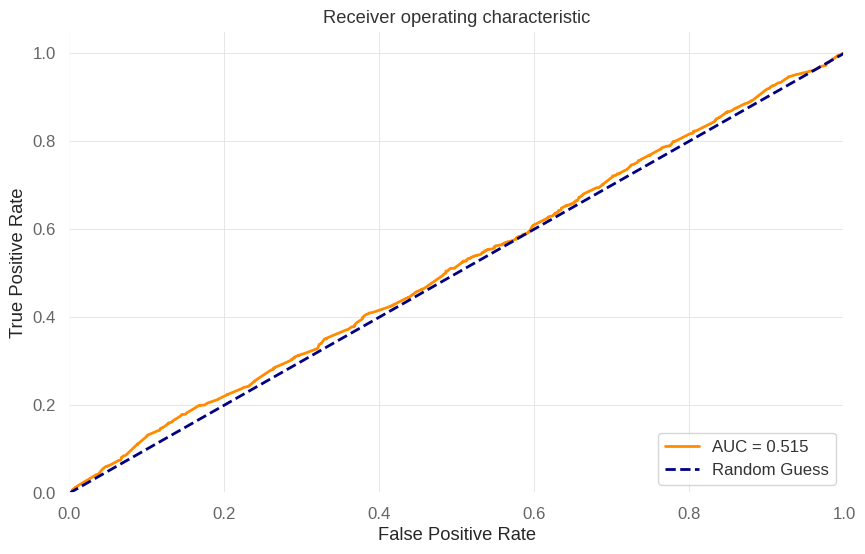

In [ ]:
# Plotting AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.style.use('seaborn-dark')
plt.grid(True)
plt.show()

In [ ]:
importances = model.feature_importances_
importances

array([0.  , 0.02, 0.  , 0.  , 0.02, 0.06, 0.06, 0.04, 0.02, 0.04, 0.  ,
       0.  , 0.  , 0.02, 0.  , 0.04, 0.06, 0.06, 0.04, 0.04, 0.02, 0.02,
       0.06, 0.  , 0.  , 0.02, 0.02, 0.12, 0.02, 0.  , 0.12, 0.  , 0.  ,
       0.  , 0.04, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

In [ ]:
indices = np.argsort(importances)[::-1]
indices

array([27, 30, 22,  5, 16,  6, 17, 18, 35, 34,  9, 19, 15,  7,  4, 25, 20,
       21, 13,  1, 26, 28,  8, 14, 12,  2,  3, 10, 11, 45, 44, 23, 24, 29,
       31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43,  0])

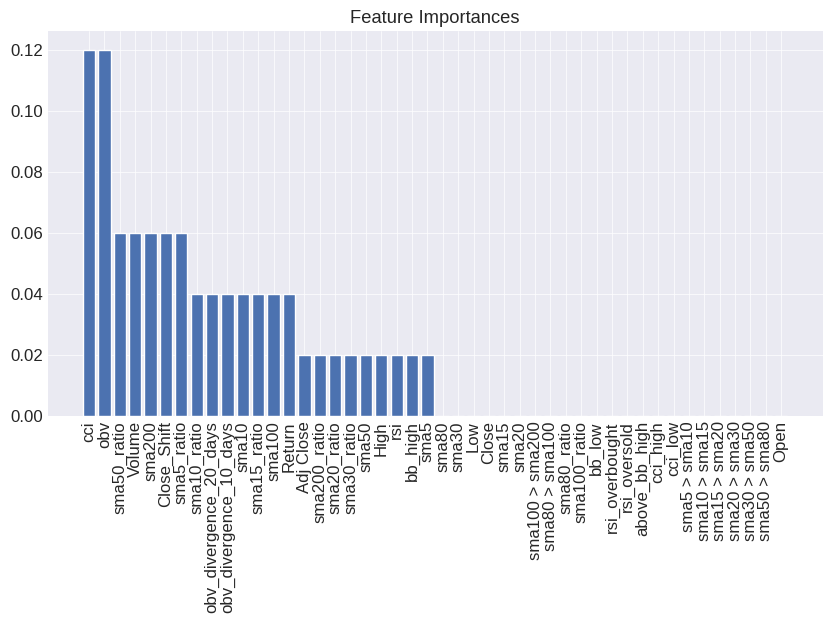

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.grid(True)
plt.show()

In [ ]:
y_pred

array([0.5149283 , 0.5093937 , 0.51603088, ..., 0.50691553, 0.50691553,
       0.50699814])

In [ ]:
quantile_intervals = np.arange(0, 1.125, 0.125)
quantile_values = np.quantile(y_pred, quantile_intervals)
classes = pd.cut(y_pred, quantile_values)
x_test['y_true'] = y_test
table = pd.crosstab(classes, x_test['y_true'])
table

y_true,0,1
row_0,,
"(0.3448, 0.5065]",203,199
"(0.5065, 0.5073]",182,191
"(0.5073, 0.5086]",173,210
"(0.5086, 0.5147]",194,201
"(0.5147, 0.5156]",176,203
"(0.5156, 0.5163]",189,201
"(0.5163, 0.517]",202,199
"(0.517, 0.522]",150,215


In [ ]:
sign = np.zeros_like(y_pred)

sign[((y_pred >= 0.3477) & (y_pred < 0.5087)) | ((y_pred > 0.5189)  & (y_pred < 0.5195))] = -1

sign[((y_pred >= 0.5087) & (y_pred <= 0.5189)) |
     ((y_pred >= 0.5195) & (y_pred <= 0.5252))] = 1

sign


array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [ ]:
x_test['sign'] = sign

In [ ]:
x_test.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_Shift,Return,sma5,sma10,...,sma5 > sma10,sma10 > sma15,sma15 > sma20,sma20 > sma30,sma30 > sma50,sma50 > sma80,sma80 > sma100,sma100 > sma200,y_true,sign
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-17,15.062143,15.239286,14.855000,14.999643,12.714891,686044800,12.775745,-0.476324,12.430014,11.926945,...,1,1,0,1,1,1,1,1,1,1.0
2011-10-18,15.062857,15.171786,14.856786,15.080000,12.783012,881602400,12.714891,0.535757,12.562918,12.077529,...,1,1,0,1,1,1,1,1,0,1.0
2011-10-19,14.333929,14.586429,14.207143,14.236429,12.067932,1104059600,12.783012,-5.593989,12.541302,12.139198,...,1,1,0,1,1,1,1,1,0,1.0
2011-10-20,14.285714,14.298214,14.078929,14.118214,11.967724,549270400,12.067932,-0.830368,12.461861,12.193510,...,1,1,0,0,1,1,1,1,0,1.0
2011-10-21,14.217857,14.255000,13.955357,14.031071,11.893855,621244400,11.967724,-0.617233,12.285483,12.263353,...,1,1,1,0,1,1,1,1,1,1.0
2011-10-24,14.149286,14.517857,14.121429,14.491786,12.284397,502138000,11.893855,3.283561,12.199384,12.314699,...,0,1,1,0,1,1,1,1,0,1.0
2011-10-25,14.465357,14.519643,14.192143,14.206071,12.042197,430427200,12.284397,-1.971606,12.051221,12.307070,...,0,1,1,0,1,1,1,1,1,1.0
2011-10-26,14.348571,14.376786,14.041071,14.307143,12.127872,456304800,12.042197,0.711459,12.063209,12.302255,...,0,1,1,0,1,1,1,1,1,1.0
2011-10-27,14.555714,14.607143,14.353214,14.453214,12.251695,494664800,12.127872,1.020972,12.120003,12.290932,...,0,1,1,0,1,1,1,1,1,1.0


In [ ]:
x_test['position'] = x_test['sign'].shift(1)
x_test['model_returns'] = x_test['position'] * x_test['Return']


In [ ]:
x_test['position']

Date
2011-10-17    NaN
2011-10-18    1.0
2011-10-19    1.0
2011-10-20    1.0
2011-10-21    1.0
             ... 
2024-01-22   -1.0
2024-01-23   -1.0
2024-01-24   -1.0
2024-01-25   -1.0
2024-01-26   -1.0
Name: position, Length: 3089, dtype: float64

In [ ]:
buy_and_hold_total_returns = (1 + x_test['Return'] / 100).cumprod()
buy_and_hold_total_returns = (buy_and_hold_total_returns - 1) * 100

model_cumulative_returns = (1 + x_test['model_returns'] / 100).cumprod()
model_cumulative_returns = (model_cumulative_returns - 1) * 100

Text(0.5, 1.0, 'Stock Returns vs Model Returns')

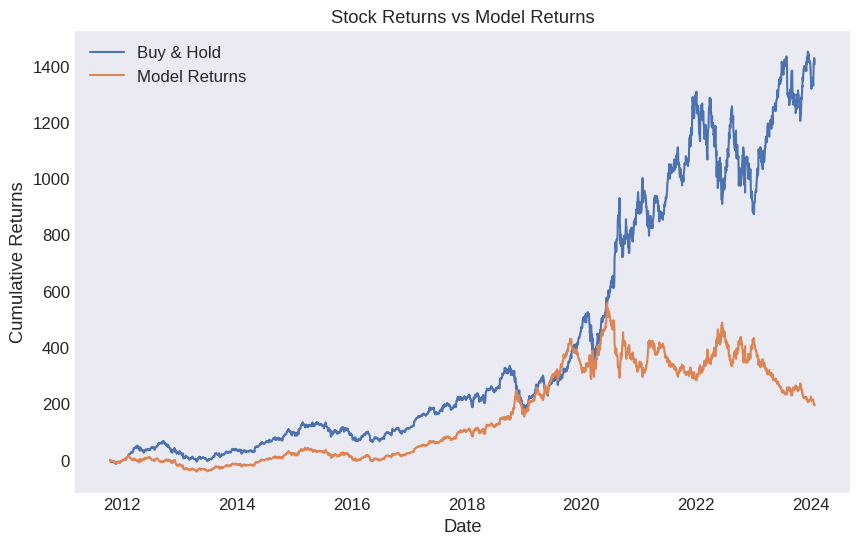

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(buy_and_hold_total_returns, label = 'Buy & Hold')
ax.plot(model_cumulative_returns, label = 'Model Returns')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Stock Returns vs Model Returns')

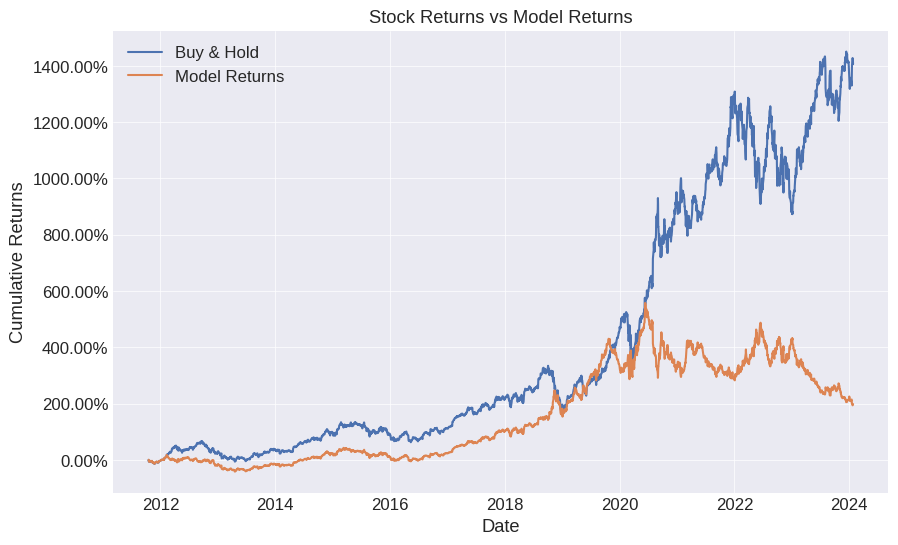


 Buy & Hold Cumulative Returns = 1406.14% 
 Model Cumulative Returns = 198.21%


In [ ]:
# Computing Apple stock's cumulative returns
buy_and_hold_total_returns = (1 + x_test['Return'] / 100).cumprod()
buy_and_hold_total_returns = (buy_and_hold_total_returns - 1) * 100

# Computing model's cumulative returns
model_cumulative_returns = (1 + x_test['model_returns'] / 100).cumprod()
model_cumulative_returns = (model_cumulative_returns - 1) * 100

# Plotting line plot comparing Buy & Hold and Model
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(buy_and_hold_total_returns, label = 'Buy & Hold')
ax.plot(model_cumulative_returns, label = 'Model Returns')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Stock Returns vs Model Returns')

# Adding a '%' sign to the y-axis ticks
def percent_formatter(x, pos):
    return f'{x:.2f}%'
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))

plt.style.use('seaborn-dark')
plt.grid(True)
plt.show()

# Printing results
print(f'\n Buy & Hold Cumulative Returns = {buy_and_hold_total_returns.iloc[-1]:.2f}% \n Model Cumulative Returns = {model_cumulative_returns.iloc[-1]:.2f}%')

[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2011-10-19   2011-10-19
End Period                 2024-01-26   2024-01-26
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          1,405.28%    196.62%
CAGR﹪                     16.47%       6.3%

Sharpe                     0.92         0.45
Prob. Sharpe Ratio         99.93%       94.37%
Smart Sharpe               0.89         0.44
Sortino                    1.35         0.65
Smart Sortino              1.31         0.63
Sortino/√2                 0.95         0.46
Smart Sortino/√2           0.92         0.45
Omega                      1.09         1.09

Max Drawdown               -43.8%       -55.29%
Longest DD Days            660          1321
Volatility (ann.)          28.42%       28.46%
R^2                        0.03         0.03
Information Ratio          -0.02        -

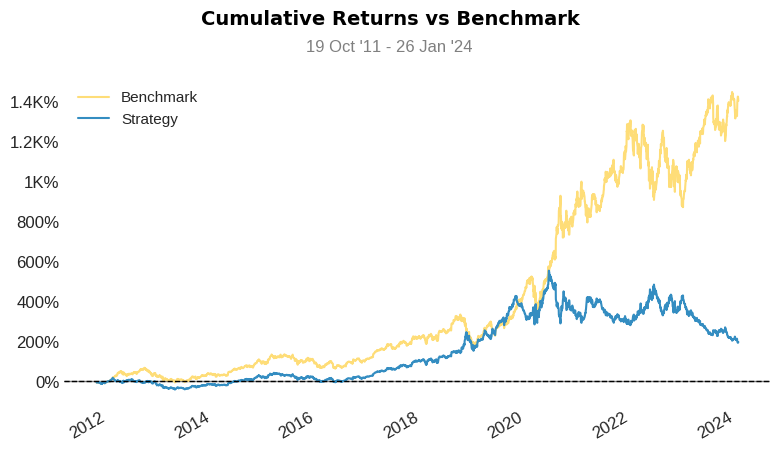

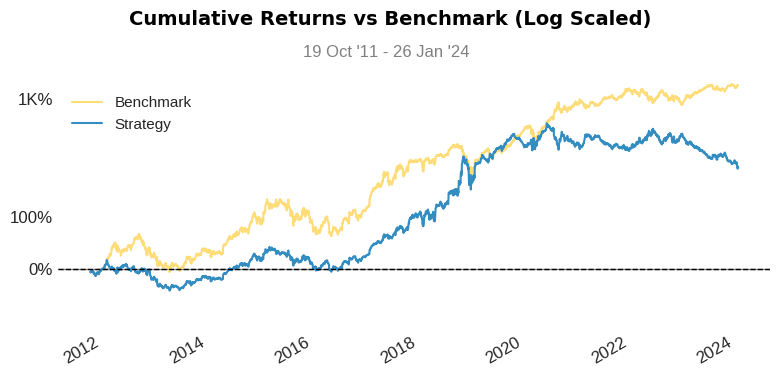

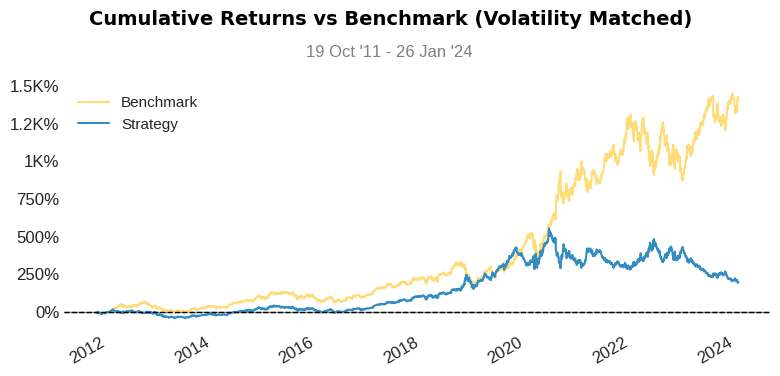

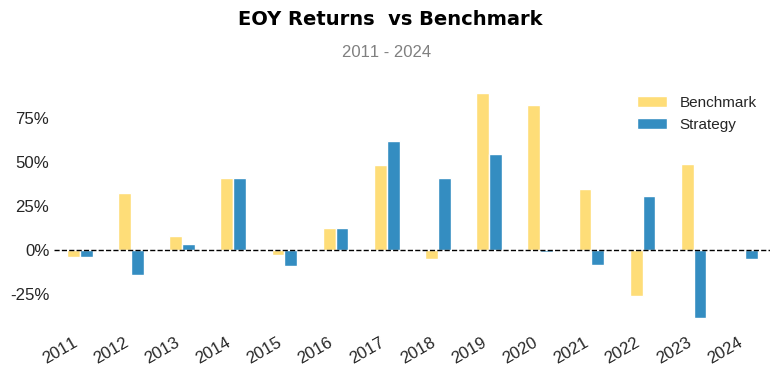

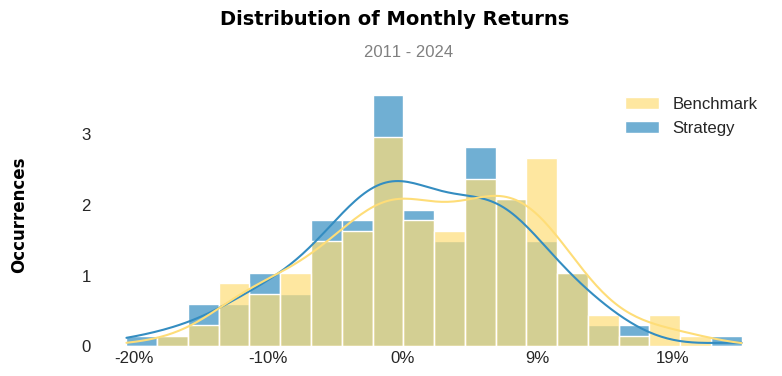

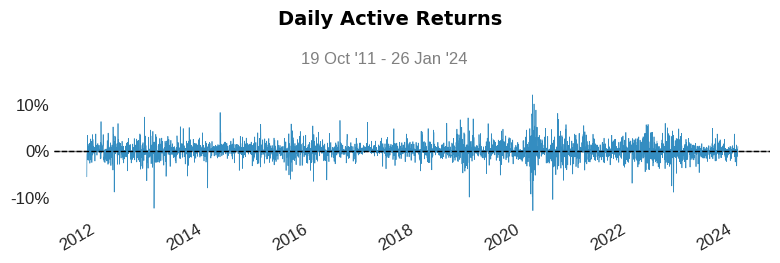

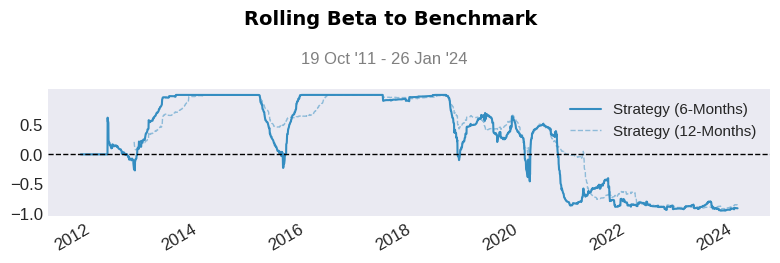

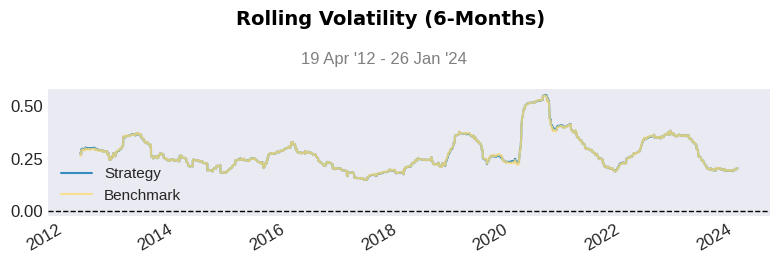

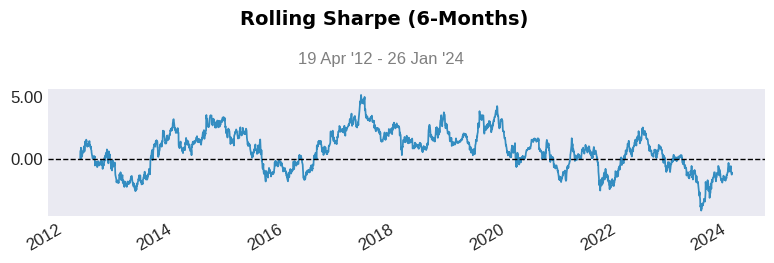

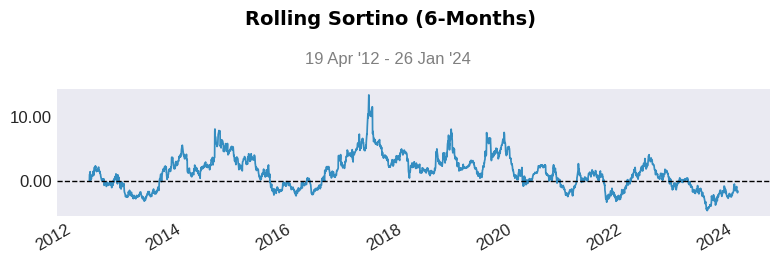

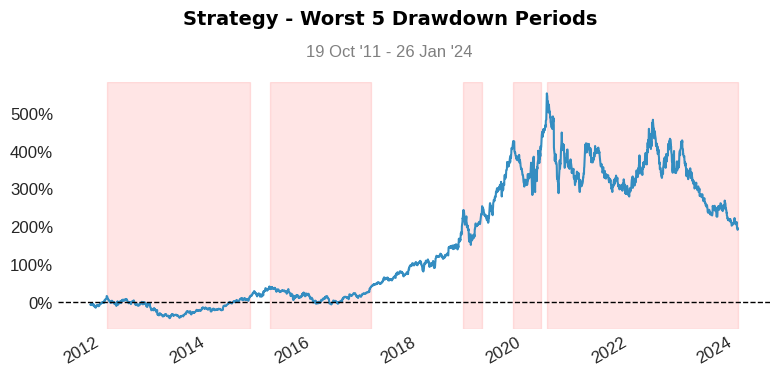

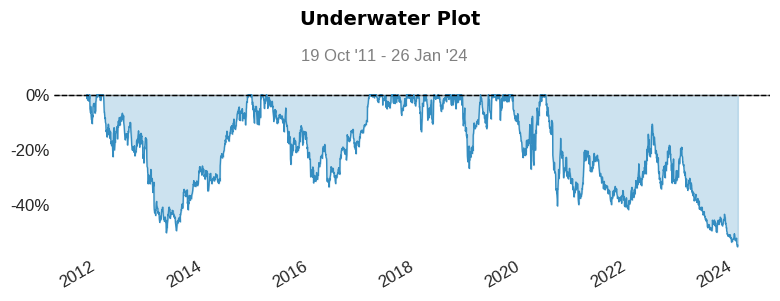

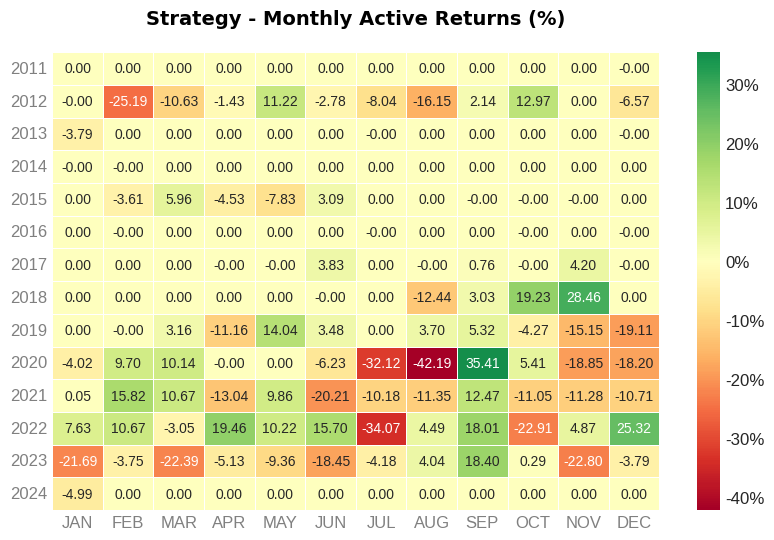

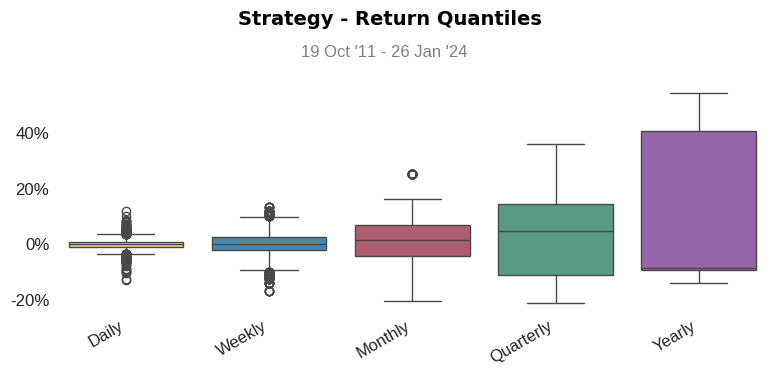

In [ ]:
model_returns = (x_test['model_returns'] / 100)
aapl_returns = (x_test['Return'] / 100)

qs.reports.full(model_returns, benchmark = aapl_returns)

In [ ]:
s = "Hello"
print(s.lower())

hello


TypeError: 'str' object is not callable